In [1]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "../")))

from database_operations import DatabaseOperations
from overtake_model import OvertakingModel
from race_data import RaceDataSetup
from race_dataframe import RaceDataframe
from race_sim import RaceSimulator
from evaluation import RaceSimEvaluation, EvaluateMany

import pandas as pd
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)
pd.set_option('display.max_colwidth', None) 

## Mexico GP

In [2]:
# Initialise all classes
database_ops_mexico = DatabaseOperations(2024, "Mexico City")
race_df_mexico = RaceDataframe(database_ops_mexico)
race_data_mexico = RaceDataSetup(database_ops_mexico, race_df_mexico)
overtake_model_mexico = OvertakingModel(race_df_mexico.race_df)
simulation_mexico = RaceSimulator(race_data_mexico, overtake_model_mexico)

In [3]:
race_df_mexico.race_df[race_df_mexico.race_df["driver_number"]==10]

,lap_num,lap_time,sector,stint_num,stint_lap,position,driver_name,driver_number,sector_time,tyre_type,tyre_laps,pit,pit_time,track_status,base_sector_time,cumulative_time,pace,gap,tyre_diff,front_laps,stint_laps_diff,drs_available,next_pit,overtake,stint
8,1,120.117,1,1,1,11.0,Pierre Gasly,10,NaN,2,1,False,NaN,124,27.418,NaN,NaN,0.000,0.0,1.0,0.0,False,False,True,1
28,1,120.117,2,1,1,11.0,Pierre Gasly,10,52.920,2,1,False,NaN,124,29.585,52.920,52.920000,0.964,0.0,1.0,0.0,False,False,False,1
48,1,120.117,3,1,1,11.0,Pierre Gasly,10,32.741,2,1,False,NaN,124,19.847,85.661,32.741000,0.874,0.0,1.0,0.0,False,False,False,1
68,2,136.958,1,1,2,9.0,Pierre Gasly,10,64.897,2,2,False,NaN,4,27.418,150.558,64.897000,1.838,0.0,2.0,0.0,False,False,False,1
86,2,136.958,2,1,2,9.0,Pierre Gasly,10,41.683,2,2,False,NaN,4,29.585,192.241,47.301500,1.584,0.0,2.0,0.0,False,False,False,1
104,2,136.958,3,1,2,9.0,Pierre Gasly,10,30.378,2,2,False,NaN,4,19.847,222.619,31.559500,0.648,0.0,2.0,0.0,True,False,False,1
122,3,134.313,1,1,3,9.0,Pierre Gasly,10,58.579,2,3,False,NaN,4,27.418,281.198,61.738000,1.659,0.0,3.0,0.0,False,False,False,1
140,3,134.313,2,1,3,9.0,Pierre Gasly,10,45.636,2,3,False,NaN,4,29.585,326.834,46.746333,1.082,0.0,3.0,0.0,False,False,False,1
158,3,134.313,3,1,3,9.0,Pierre Gasly,10,30.098,2,3,False,NaN,4,19.847,356.932,31.072333,0.176,0.0,3.0,0.0,True,False,False,1
176,4,130.874,1,1,4,9.0,Pierre Gasly,10,59.883,2,4,False,NaN,4,27.418,416.815,61.119667,0.838,0.0,4.0,0.0,True,False,False,1


In [4]:
simulation_mexico.simulate()
evaluation_mexico = RaceSimEvaluation(simulation_mexico, race_df_mexico, database_ops_mexico)
evaluation_mexico.comparison_df

Carlos Sainz 71 6055.8 6055.8
Lando Norris 71 6060.505 6055.8
Charles Leclerc 71 6090.187 6055.8
Lewis Hamilton 71 6100.58 6055.8
Oscar Piastri 71 6120.728 6055.8
George Russell 71 6104.336 6055.8
Max Verstappen 71 6115.358 6055.8
Kevin Magnussen 71 6119.442 6055.8
Nico Hulkenberg 70 6058.52 5975.215
Pierre Gasly 70 6074.387 5975.215
Lance Stroll 70 6080.872 5975.215
Franco Colapinto 70 6083.297 5975.215
Esteban Ocon 70 6095.463 5975.215
Valtteri Bottas 70 6098.027 5975.215
Guanyu Zhou 70 6117.522 5975.215
Liam Lawson 70 6120.266 5975.215
Sergio Perez 70 6129.084 5975.215


,driver_name,laps_completed,position_sim,position_actual,position_error,overtakes_sim,overtakes_actual,overtake_error,cumulative_time_sim,cumulative_time_actual,cumulative_time_error,gap_to_leader_sim,gap_to_leader_actual,gap_error
0,Carlos Sainz,71,1,1.0,0.0,6,0,6,6263.274114,6055.800,207.474114,0.0,0.0,0.0
1,Lando Norris,71,2,2.0,0.0,1,2,-1,6265.449308,6060.505,204.944308,2.175194,4.705,-2.529806
2,Charles Leclerc,71,3,3.0,0.0,7,1,6,6288.469647,6090.187,198.282647,25.195533,34.387,-9.191467
3,Lewis Hamilton,71,4,4.0,0.0,6,2,4,6299.578047,6100.580,198.998047,36.303933,44.78,-8.476067
4,Oscar Piastri,71,5,8.0,-3.0,7,4,3,6310.674003,6120.728,189.946003,47.399889,64.928,-17.528111
5,George Russell,71,6,5.0,1.0,3,2,1,6311.681661,6104.336,207.345661,48.407547,48.536,-0.128453
6,Max Verstappen,71,7,6.0,1.0,2,4,-2,6317.422278,6115.358,202.064278,54.148164,59.558,-5.409836
7,Kevin Magnussen,71,8,7.0,1.0,7,1,6,6327.308067,6119.442,207.866067,64.033953,63.642,0.391953
8,Nico Hulkenberg,70,9,9.0,0.0,4,2,2,6343.899743,6058.520,285.379743,80.625629,83.305,-2.679371
9,Pierre Gasly,70,10,10.0,0.0,2,3,-1,6363.300474,6074.387,288.913474,100.02636,99.172,0.85436


In [5]:
print(evaluation_mexico.comparison_df["overtakes_actual"].sum())
print(evaluation_mexico.comparison_df["overtakes_sim"].sum())

66
84


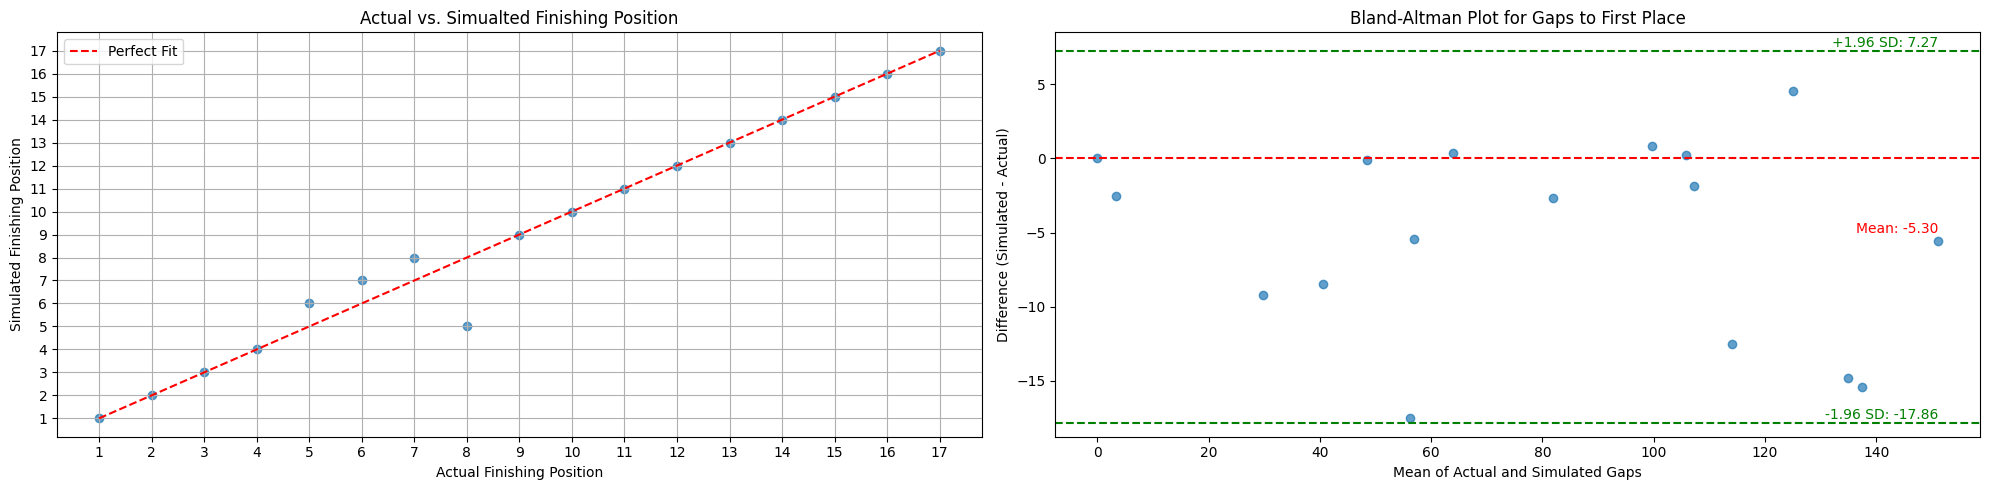

In [6]:
evaluation_mexico.plot_evaluation_results()

In [7]:
evaluation_mexico.calculate_general_errors()

{'total_absolute_position_error': 6.0,
 'position_mae': np.float64(0.35294117647058826),
 'total_absolute_overtake_error': np.int64(58),
 'overtake_mae': np.float64(3.411764705882353),
 'cumulative_time_mae': np.float64(244.83821941256102),
 'gap_mae': np.float64(6.009178585971741)}

In [8]:
evaluation_mexico.calculate_spearman()

{'cumulative_times': {'correlation': np.float64(0.42156862745098045),
  'p_value': np.float64(0.09191262861281846)},
 'gaps_to_leader': {'correlation': np.float64(0.985294117647059),
  'p_value': np.float64(6.341615043472023e-13)}}

In [9]:
evaluation_mexico.calculate_wilcoxon()

{'cumulative_times': {'statistic': np.float64(0.0),
  'expected_value': np.float64(76.5),
  'p_value': np.float64(1.52587890625e-05)},
 'gaps_to_leader': {'statistic': np.float64(17.0),
  'expected_value': np.float64(68.0),
  'p_value': np.float64(0.008360653818070695)}}

## Singapore GP

In [10]:
# Initialise all classes
database_ops_singapore = DatabaseOperations(2024, "Marina Bay")
race_df_singapore = RaceDataframe(database_ops_singapore)
race_data_singapore = RaceDataSetup(database_ops_singapore, race_df_singapore)
overtake_model_singapore = OvertakingModel(race_df_singapore.race_df)
simulation_singapore = RaceSimulator(race_data_singapore, overtake_model_singapore)

In [11]:
simulation_singapore.simulate()
evaluation_singapore = RaceSimEvaluation(simulation_singapore, race_df_singapore, database_ops_singapore)
evaluation_singapore.comparison_df

Lando Norris 62 6052.571 6052.571
Max Verstappen 62 6073.516 6052.571
Oscar Piastri 62 6094.394 6052.571
Charles Leclerc 62 6115.001 6052.571
George Russell 62 6113.611 6052.571
Lewis Hamilton 62 6137.819 6052.571
Carlos Sainz 62 6148.61 6052.571
Fernando Alonso 61 6053.4439999999995 5954.649
Franco Colapinto 61 6058.855 5954.649
Nico Hulkenberg 61 6055.711 5954.649
Sergio Perez 61 6057.195 5954.649
Yuki Tsunoda 61 6061.363 5954.649
Lance Stroll 61 6100.142 5954.649
Esteban Ocon 61 6096.576 5954.649
Pierre Gasly 61 6111.63 5954.649
Guanyu Zhou 61 6109.791 5954.649
Valtteri Bottas 61 6110.4 5954.649
Daniel Ricciardo 61 6142.367 5954.649


,driver_name,laps_completed,position_sim,position_actual,position_error,overtakes_sim,overtakes_actual,overtake_error,cumulative_time_sim,cumulative_time_actual,cumulative_time_error,gap_to_leader_sim,gap_to_leader_actual,gap_error
0,Lando Norris,62,1,1,0,0,0,0,6250.063474,6052.571,197.492474,0.0,0.0,0.0
1,Max Verstappen,62,2,2,0,0,1,-1,6276.788113,6073.516,203.272113,26.724639,20.945,5.779639
2,Oscar Piastri,62,3,3,0,1,1,0,6293.795844,6094.394,199.401844,43.73237,41.823,1.90937
3,Charles Leclerc,62,4,5,-1,1,2,-1,6311.925221,6115.001,196.924221,61.861747,62.43,-0.568253
4,George Russell,62,5,4,1,0,3,-3,6314.709868,6113.611,201.098868,64.646394,61.04,3.606394
5,Lewis Hamilton,62,6,6,0,0,4,-4,6336.947314,6137.819,199.128314,86.88384,85.248,1.63584
6,Carlos Sainz,62,7,7,0,1,3,-2,6338.944975,6148.610,190.334975,88.8815,96.039,-7.1575
7,Fernando Alonso,61,8,8,0,4,3,1,6343.952119,6053.444,290.508119,93.888644,98.795,-4.906356
8,Franco Colapinto,61,9,11,-2,5,2,3,6344.511214,6058.855,285.656214,94.44774,104.206,-9.75826
9,Nico Hulkenberg,61,10,9,1,1,2,-1,6351.119497,6055.711,295.408497,101.056023,101.062,-0.005977


In [12]:
print(evaluation_singapore.comparison_df["overtakes_actual"].sum())
print(evaluation_singapore.comparison_df["overtakes_sim"].sum())

58
30


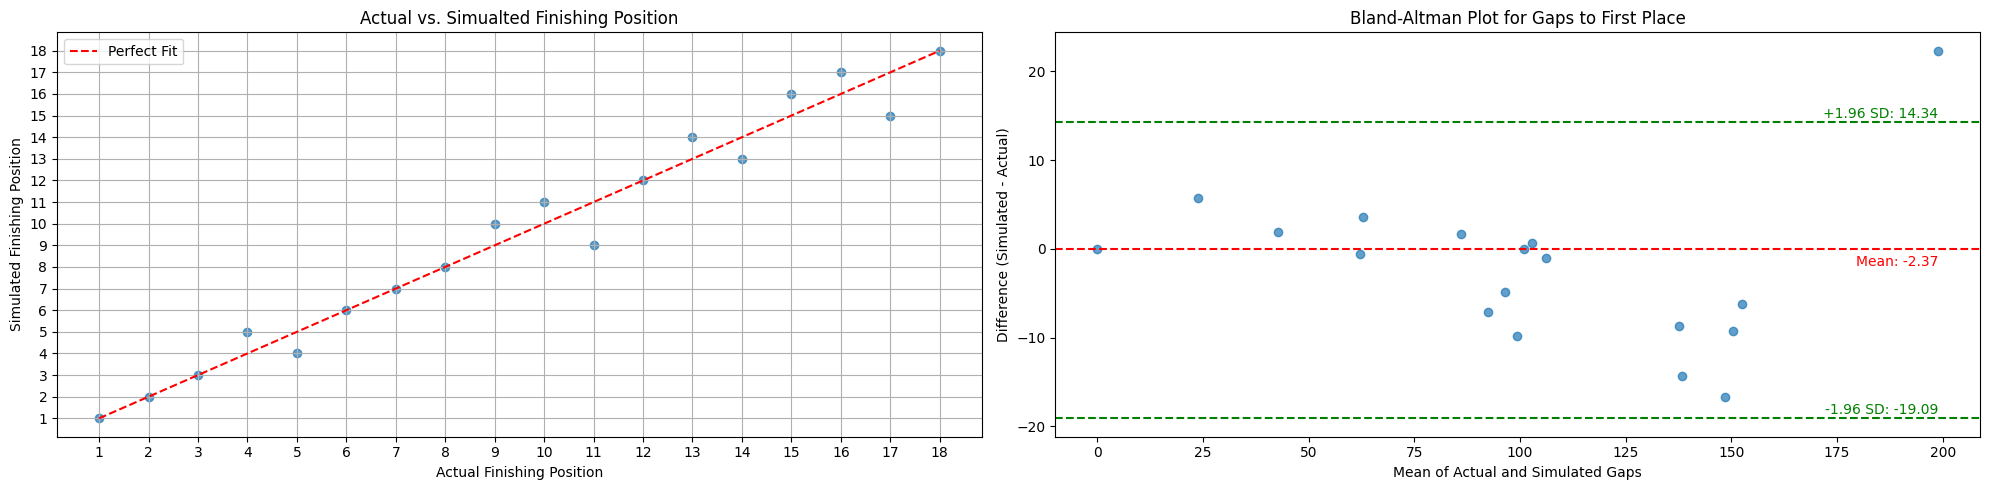

In [13]:
evaluation_singapore.plot_evaluation_results()

In [14]:
evaluation_singapore.calculate_general_errors()

{'total_absolute_position_error': 12,
 'position_mae': np.float64(0.6666666666666666),
 'total_absolute_overtake_error': np.int64(33),
 'overtake_mae': np.float64(1.8333333333333333),
 'cumulative_time_mae': np.float64(254.96053742950147),
 'gap_mae': np.float64(6.369573462230316)}

In [15]:
evaluation_singapore.calculate_spearman()

{'cumulative_times': {'correlation': np.float64(0.2280701754385965),
  'p_value': np.float64(0.3627002084947103)},
 'gaps_to_leader': {'correlation': np.float64(0.9834881320949431),
  'p_value': np.float64(2.6382891204281573e-13)}}

In [16]:
evaluation_singapore.calculate_wilcoxon()

{'cumulative_times': {'statistic': np.float64(0.0),
  'expected_value': np.float64(85.5),
  'p_value': np.float64(7.62939453125e-06)},
 'gaps_to_leader': {'statistic': np.float64(47.0),
  'expected_value': np.float64(76.5),
  'p_value': np.float64(0.1625717591562893)}}

## Spanish GP

In [17]:
# Initialise all classes
database_ops_spain = DatabaseOperations(2024, "Barcelona")
race_df_spain = RaceDataframe(database_ops_spain)
race_data_spain = RaceDataSetup(database_ops_spain, race_df_spain)
overtake_model_spain = OvertakingModel(race_df_spain.race_df)
simulation_spain = RaceSimulator(race_data_spain, overtake_model_spain)

In [18]:
simulation_spain.simulate()
evaluation_spain = RaceSimEvaluation(simulation_spain, race_df_spain, database_ops_spain)
evaluation_spain.comparison_df

Lando Norris 66 5302.446 5300.227
Max Verstappen 66 5300.227 5300.227
Lewis Hamilton 66 5318.017 5300.227
George Russell 66 5322.547 5300.227
Carlos Sainz 66 5331.255 5300.227
Charles Leclerc 66 5322.936 5300.227
Oscar Piastri 66 5333.987 5300.227
Pierre Gasly 66 5362.252 5300.227
Sergio Perez 66 5359.751 5300.227
Esteban Ocon 66 5372.116 5300.227
Nico Hulkenberg 66 5374.442 5300.227
Fernando Alonso 65 5309.724 5220.453
Lance Stroll 65 5325.479 5220.453
Valtteri Bottas 65 5353.54 5220.453
Daniel Ricciardo 65 5344.277 5220.453
Guanyu Zhou 65 5315.703 5220.453
Kevin Magnussen 65 5355.015 5220.453
Alexander Albon 65 5358.376 5220.453
Yuki Tsunoda 65 5364.131 5220.453
Logan Sargeant 64 5305.093 5140.986


,driver_name,laps_completed,position_sim,position_actual,position_error,overtakes_sim,overtakes_actual,overtake_error,cumulative_time_sim,cumulative_time_actual,cumulative_time_error,gap_to_leader_sim,gap_to_leader_actual,gap_error
0,Lando Norris,66,1,2,-1,2,2,0,5507.238154,5302.446,204.792154,0.000000,2.219,-2.219000
1,Max Verstappen,66,2,1,1,1,2,-1,5508.112470,5300.227,207.885470,0.874316,0.000,0.874316
2,Lewis Hamilton,66,3,3,0,7,5,2,5515.482692,5318.017,197.465692,8.244538,17.790,-9.545462
3,George Russell,66,4,4,0,0,7,-7,5526.490033,5322.547,203.943033,19.251879,22.320,-3.068121
4,Carlos Sainz,66,5,6,-1,4,7,-3,5532.528361,5331.255,201.273361,25.290207,31.028,-5.737793
5,Charles Leclerc,66,6,5,1,0,4,-4,5533.676203,5322.936,210.740203,26.438049,22.709,3.729049
6,Oscar Piastri,66,7,7,0,4,4,0,5536.572377,5333.987,202.585377,29.334223,33.760,-4.425777
7,Pierre Gasly,66,8,9,-1,15,7,8,5551.381007,5362.252,189.129007,44.142853,62.025,-17.882147
8,Sergio Perez,66,9,8,1,5,6,-1,5551.841125,5359.751,192.090125,44.602971,59.524,-14.921029
9,Esteban Ocon,66,10,10,0,0,7,-7,5576.192338,5372.116,204.076338,68.954184,71.889,-2.934816


In [19]:
print(evaluation_spain.comparison_df["overtakes_actual"].sum())
print(evaluation_spain.comparison_df["overtakes_sim"].sum())

116
81


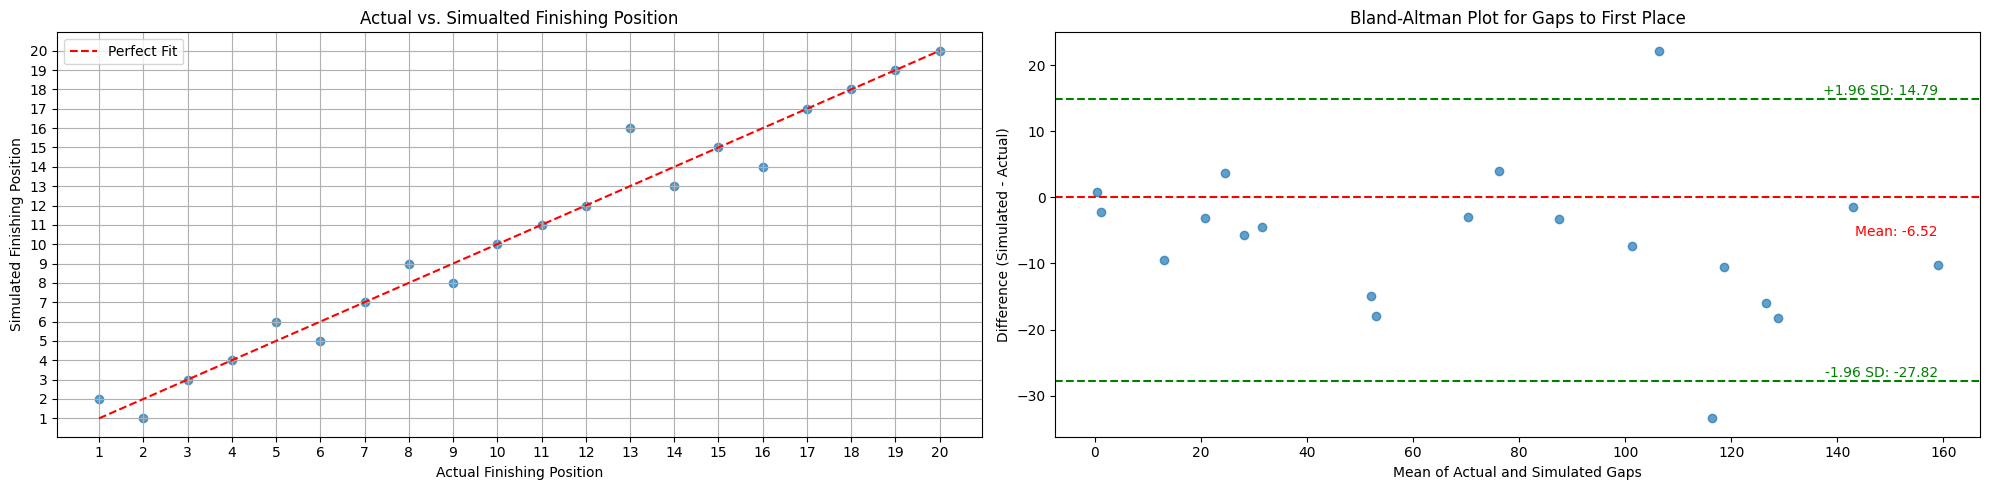

In [20]:
evaluation_spain.plot_evaluation_results()

In [21]:
evaluation_spain.calculate_general_errors()

{'total_absolute_position_error': 12,
 'position_mae': np.float64(0.6),
 'total_absolute_overtake_error': np.int64(69),
 'overtake_mae': np.float64(3.45),
 'cumulative_time_mae': np.float64(240.36775424301604),
 'gap_mae': np.float64(9.590562400512136)}

In [22]:
evaluation_spain.calculate_spearman()

{'cumulative_times': {'correlation': np.float64(0.3413533834586466),
  'p_value': np.float64(0.14076469716030804)},
 'gaps_to_leader': {'correlation': np.float64(0.9849624060150375),
  'p_value': np.float64(3.53643200208412e-15)}}

In [23]:
evaluation_spain.calculate_wilcoxon()

{'cumulative_times': {'statistic': np.float64(0.0),
  'expected_value': np.float64(105.0),
  'p_value': np.float64(1.9073486328125e-06)},
 'gaps_to_leader': {'statistic': np.float64(35.0),
  'expected_value': np.float64(105.0),
  'p_value': np.float64(0.0072956085205078125)}}

In [25]:
from docx import Document
import os
import pandas as pd

def dataframe_to_word(df, race_name, base_folder="tables_word"):
    """
    Converts a pandas DataFrame to a Word table and saves it in a folder named after the race.

    Args:
        df (pd.DataFrame): The DataFrame to convert.
        race_name (str): The name of the race (e.g., "Mexico GP").
        base_folder (str): The base folder where all race folders will be created.
    """
    # Create the base folder if it doesn't exist
    if not os.path.exists(base_folder):
        os.makedirs(base_folder)

    # Define the file path for the Word document
    file_name = os.path.join(base_folder, f"{race_name.replace(' ', '_')}_comparison_table.docx")

    # Create a new Word document
    doc = Document()

    # Add a title to the document
    doc.add_heading(f"{race_name} Comparison Table", level=1)

    # Format DataFrame: Round floats to 3 decimal places and convert integers where applicable
    def format_value(value):
        if isinstance(value, float):
            # Check if the float is effectively an integer
            if value.is_integer():
                return str(int(value))  # Convert to integer string representation
            else:
                return f"{value:.3f}"  # Round to 3 decimal places
        return str(value)  # Return as string for non-float values

    # Apply formatting to all elements in the DataFrame
    formatted_data = [[format_value(cell) for cell in row] for row in df.values]
    formatted_columns = [str(col) for col in df.columns]

    # Combine headers and formatted data
    table_data = [formatted_columns] + formatted_data

    # Add a table to the document
    num_rows = len(table_data)
    num_cols = len(df.columns)
    table = doc.add_table(rows=num_rows, cols=num_cols)

    # Populate the table with data
    for row_idx, row_data in enumerate(table_data):
        for col_idx, cell_data in enumerate(row_data):
            table.cell(row_idx, col_idx).text = cell_data

    # Apply basic styling to the table
    table.style = "Table Grid"

    # Save the document
    doc.save(file_name)
    print(f"Word document saved as '{file_name}'.")

# Example usage
dataframe_to_word(
    evaluation_mexico.comparison_df[["driver_name", "laps_completed", "position_sim", "position_actual", "overtake_error", "cumulative_time_error", "gap_error"]],
    race_name="Mexico GP"
)
dataframe_to_word(
    evaluation_singapore.comparison_df[["driver_name", "laps_completed", "position_sim", "position_actual", "overtake_error", "cumulative_time_error", "gap_error"]],
    race_name="Singapore GP"
)
dataframe_to_word(
    evaluation_spain.comparison_df[["driver_name", "laps_completed", "position_sim", "position_actual", "overtake_error", "cumulative_time_error", "gap_error"]],
    race_name="Spain GP"
)

Word document saved as 'tables_word/Mexico_GP_comparison_table.docx'.
Word document saved as 'tables_word/Singapore_GP_comparison_table.docx'.
Word document saved as 'tables_word/Spain_GP_comparison_table.docx'.
